# 6. Figure 4

This notebook is used to create the panels of Figure 4.

Before starting, use 1.Preprocessing notebook to generate:
- SC2_normalized.h5ad - Normalized single-cell data

Download data available at Metabolights [www.ebi.ac.uk/metabolights/MTBLS11236], study identifier MTBLS11236 and move to data folder:
- SC2_metabolite_IDs.csv - Metabolite metadata
- SC2_DA_markers.csv - Selected SC markers
    - For a full list execute Panel E
- SC2_ORA_subclass.csv
- SC2_ORA_pathways.csv

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import read_h5ad

import sys
sys.path.insert(0, '../functions/')
import pl
import utils

### Set plot style

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats=['retina']
sns.set(rc={'figure.figsize':(5, 5),
            'legend.frameon':False},
        style='ticks',
        context='talk')

# Render figures with higher resolution.
plt.rcParams['figure.dpi']=200
# Save with transparent regions white background.
plt.rcParams['savefig.facecolor']='white'

### Set color palette

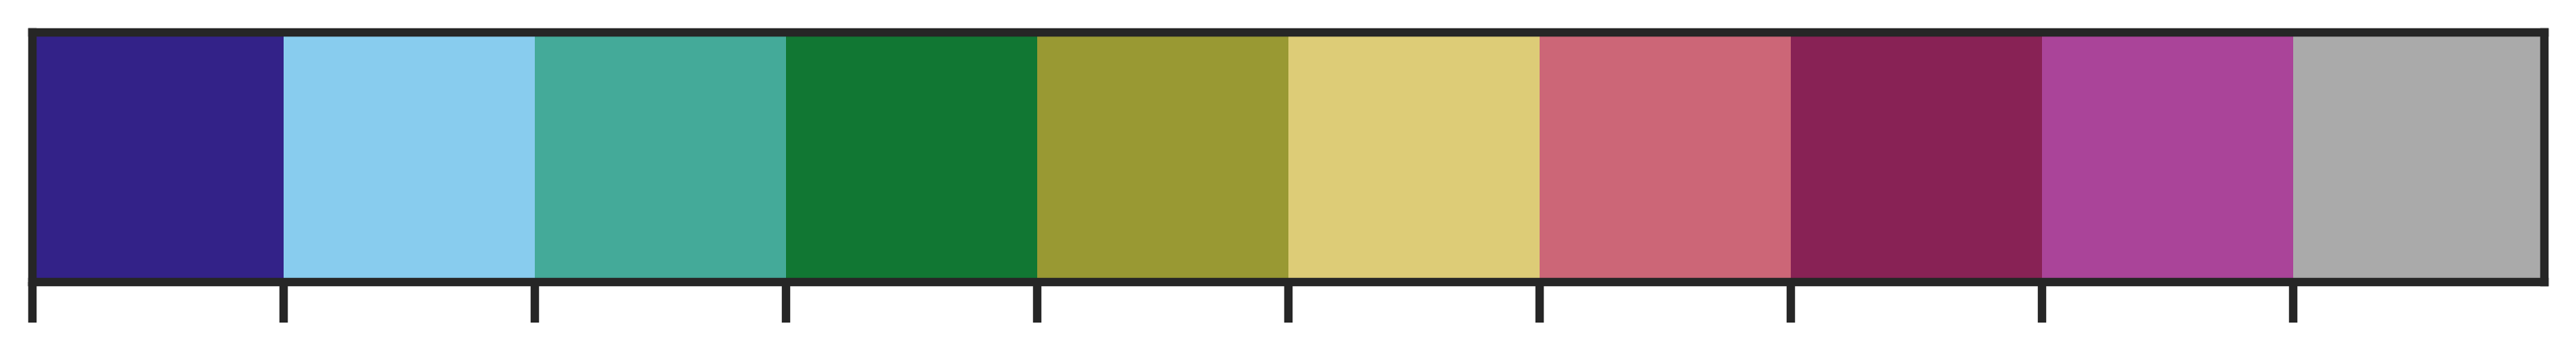

In [3]:
#color palette
palette = [(51,34,136),(136,204,238),(68,170,153),(17,119,51),(153,153,51),(221,204,119),(204,102,119),(136,34,85),(170,68,153),(170,170,170)]
palette = [(e[0]/255.0, e[1]/255.0, e[2]/255.0) for e in palette]
cmap = ListedColormap(palette)
sns.color_palette(palette=None,as_cmap=True)
sns.palplot(palette)

## Panel A

### Set paths

In [4]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [5]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [6]:
cell_qc, ion_qc = sc.pp.calculate_qc_metrics(adata, percent_top=[202])
# the condition column should be in adata.obs
condition_column = 'CellLine'
# qc table and adata.obs should have the same index
cell_qc_joined = pd.merge(adata.obs[[condition_column]], cell_qc, left_index=True, right_index=True)

### Histogram

<Figure size 700x800 with 0 Axes>

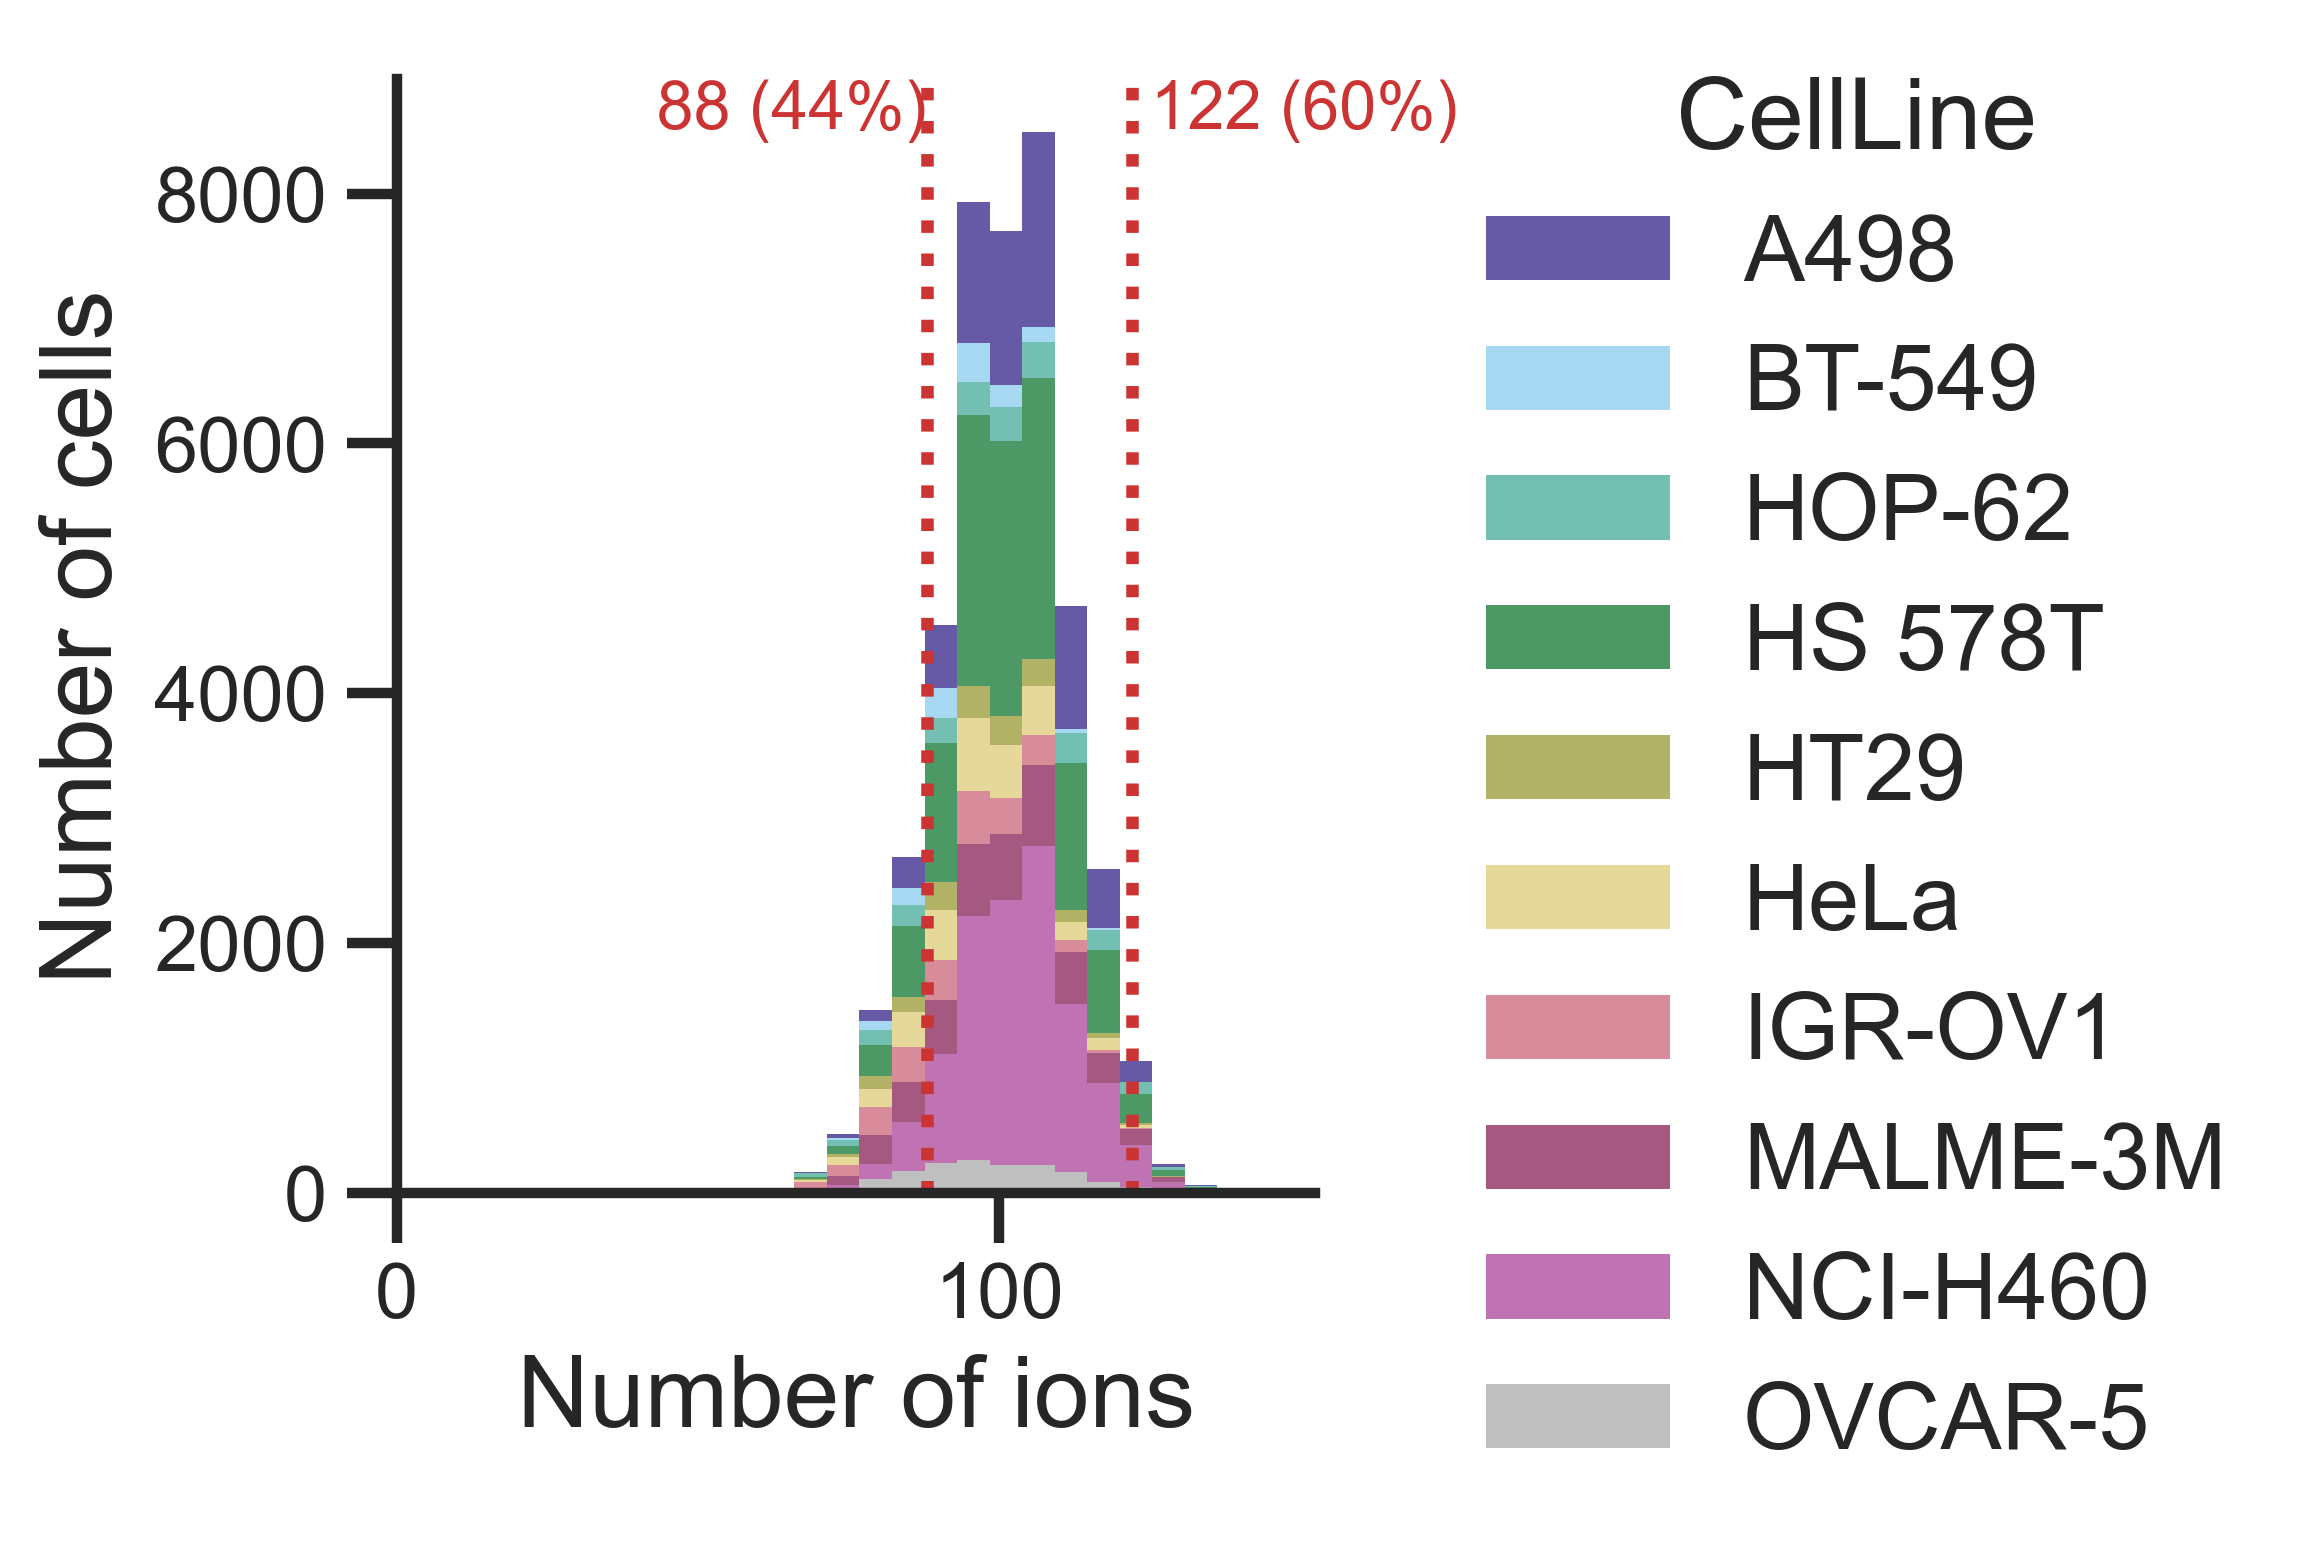

In [7]:
# calculate the cutoff percentage of ions present in each cell
min_ions1 = 88
min_ions2 = 122
percent_ions1 = min_ions1 / len(adata.var_names)
percent_ions2 = min_ions2 / len(adata.var_names)

plt.figure(figsize=(3.5, 4))
ax = sns.displot(data=cell_qc_joined,
                 x='n_genes_by_counts',
                 bins=20,
                 linewidth=0,
                 hue=condition_column,
                 palette=palette,
                 height=4,
                 aspect=1,
                 multiple='stack',
                 legend=True)

ax = ax.axes.flat[0]
ax.set_xlabel('Number of ions', fontsize=18)
ax.set_ylabel('Number of cells', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(left=0)
sns.despine(offset=0, trim=False, ax=ax)

# printing the cutoff as a vertical line with relative and absolute cutoff values
ax.axvline(x=min_ions1, linestyle=':', c='#CC3333')
ax.text(x=min_ions1, y=ax.get_ylim()[1], s=f" {min_ions1} ({percent_ions1:.0%})", fontsize=12, va='top', ha='right', color='#CC3333')
ax.axvline(x=min_ions2, linestyle=':', c='#CC3333')
ax.text(x=min_ions2, y=ax.get_ylim()[1], s=f" {min_ions2} ({percent_ions2:.0%})", fontsize=12, va='top', ha='left', color='#CC3333')

plt.savefig(plots_path / 'panel_A.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_A.svg', bbox_inches='tight')

## Panel B

### Set paths

In [8]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [9]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [10]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, random_state=12345)
sc.tl.umap(adata, random_state=12345) 
adata.obs[['UMAP1', 'UMAP2']] = adata.obsm['X_umap']

/Users/jeanydelafiori/Apps/miniconda3/envs/spacem_analysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### UMAP
#### Cell lines

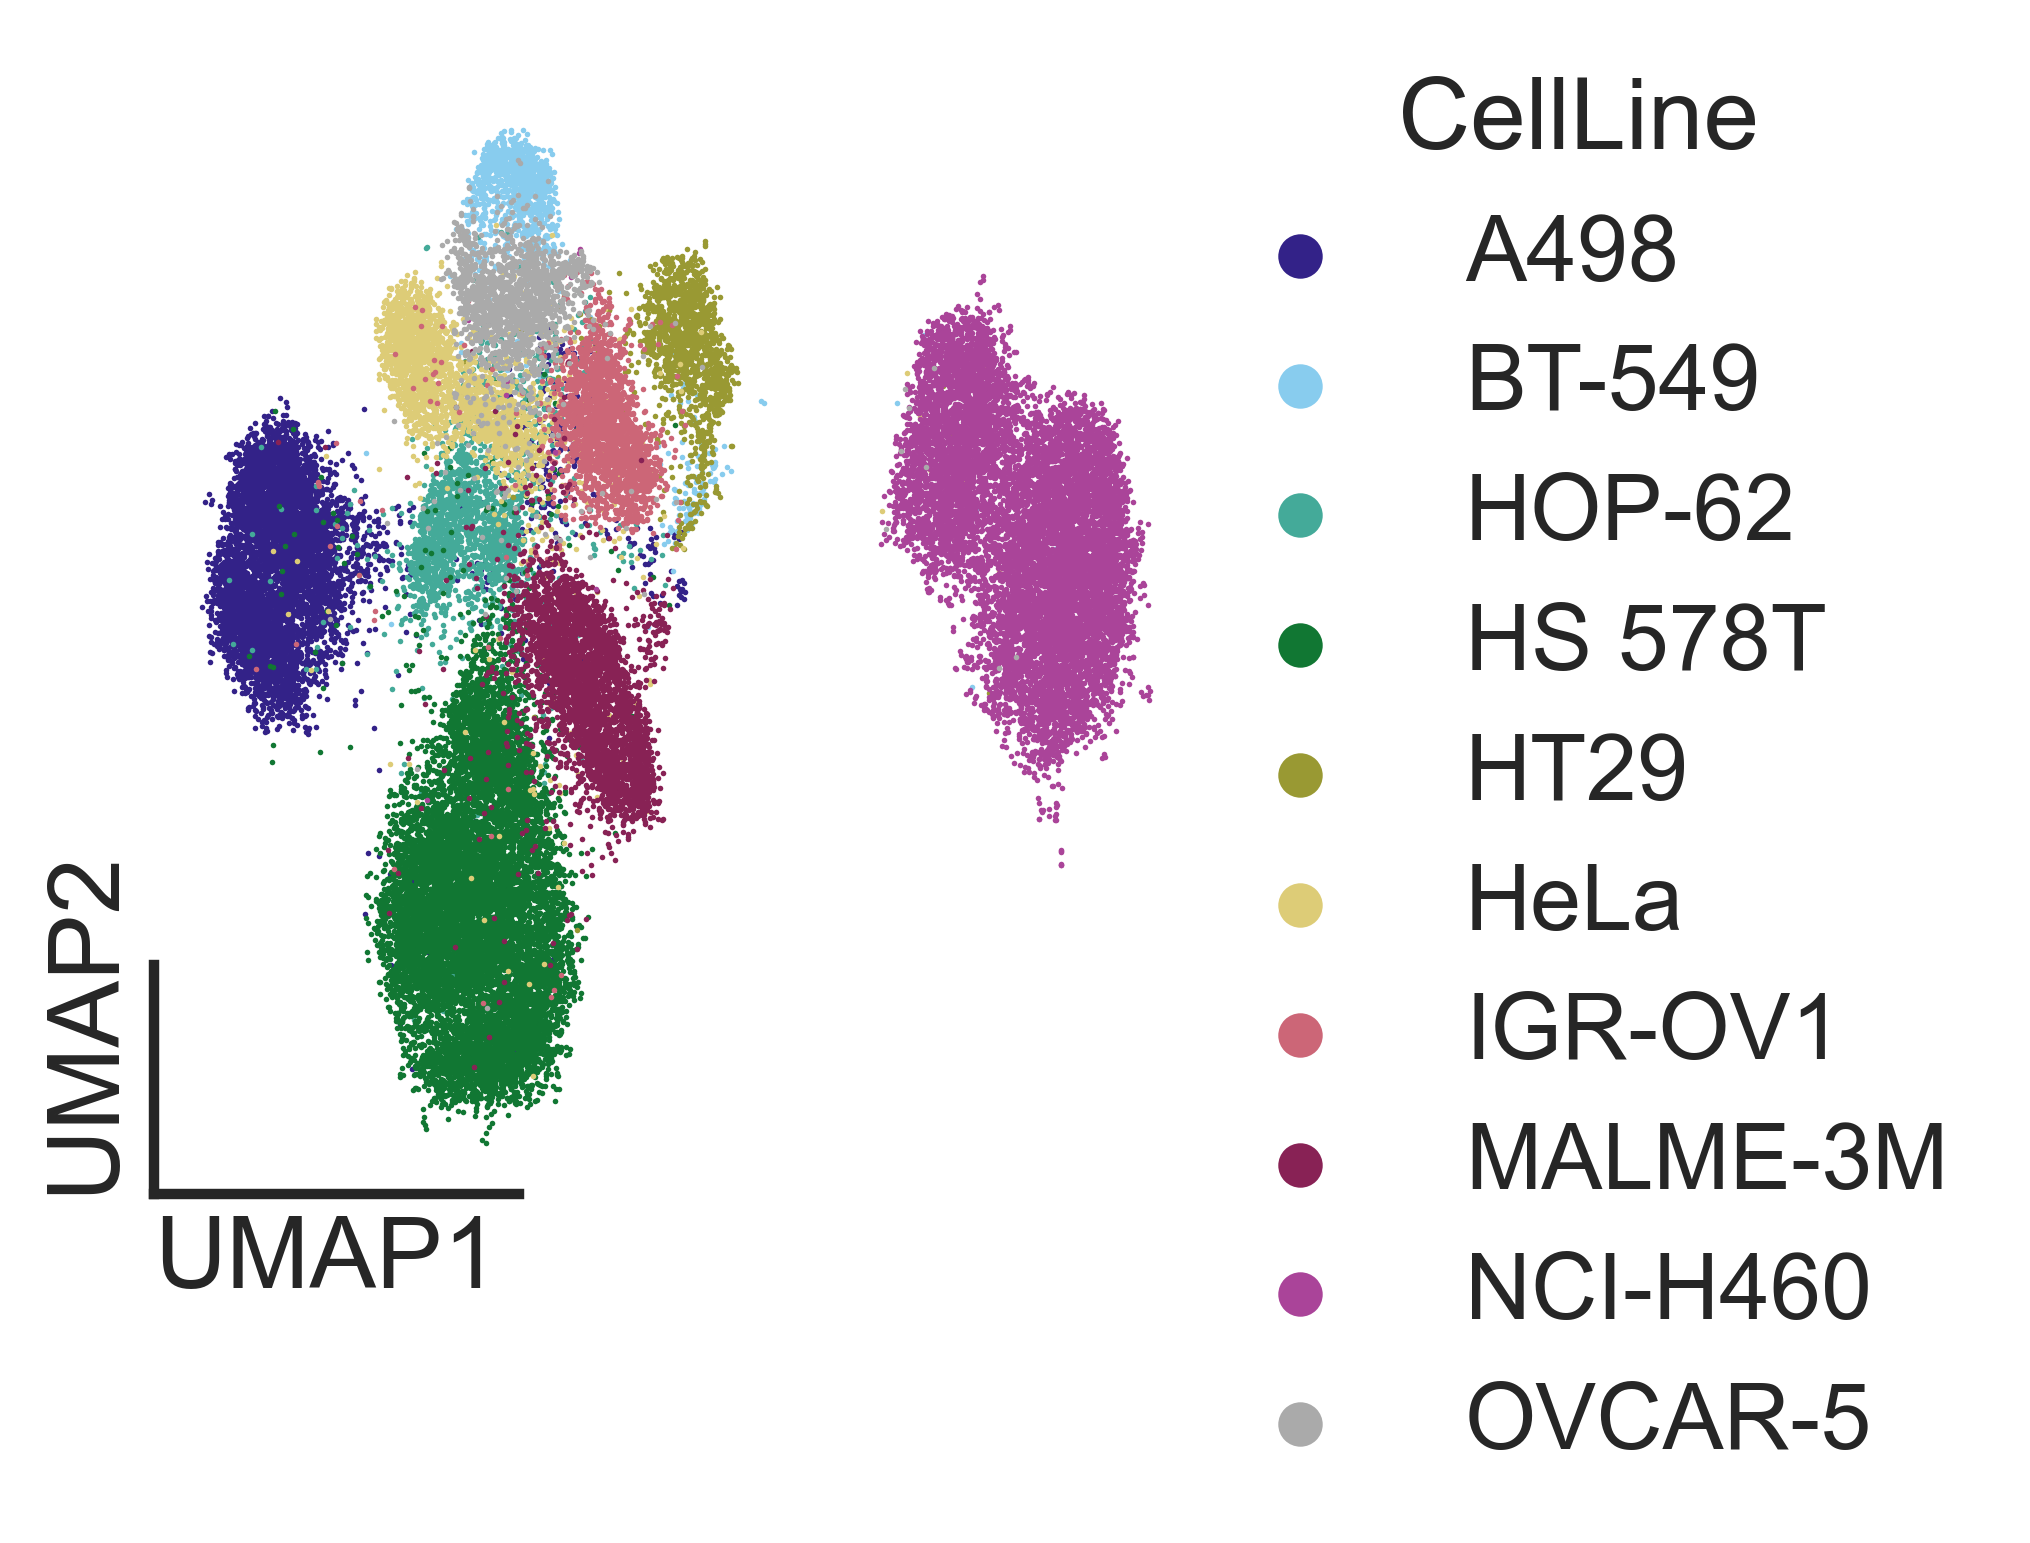

In [11]:
f = pl.highlight_scatterplot(
    data=adata,
    obsm_key='X_umap',
    hue='CellLine', 
    palette=palette,
    height=4,
    aspect=1.1,
    decorate_titles=False,
    trim_axes=True,
    scatter_kwargs={'s':1})

f.add_legend(markerscale=8)
f.set_titles(col_template='')

plt.savefig(plots_path / 'panel_B.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B.svg', bbox_inches='tight')

## Panel C

### Set paths

In [12]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [13]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [14]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, random_state=12345)
sc.tl.umap(adata, random_state=12345) 
adata.obs[['UMAP1', 'UMAP2']] = adata.obsm['X_umap']

#Using leiden for unsupervised clustering
sc.tl.leiden(adata, resolution=0.4)
adata.obs.loc[adata.obs.leiden == '7', 'leiden'] = '1'
adata.obs.leiden = adata.obs.leiden.cat.remove_unused_categories()

/var/folders/yd/30x9k4ks4xgcqd7x9_jk19c40000gn/T/ipykernel_59828/578975657.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.4)


### UMAP
#### Unsupervised clustering

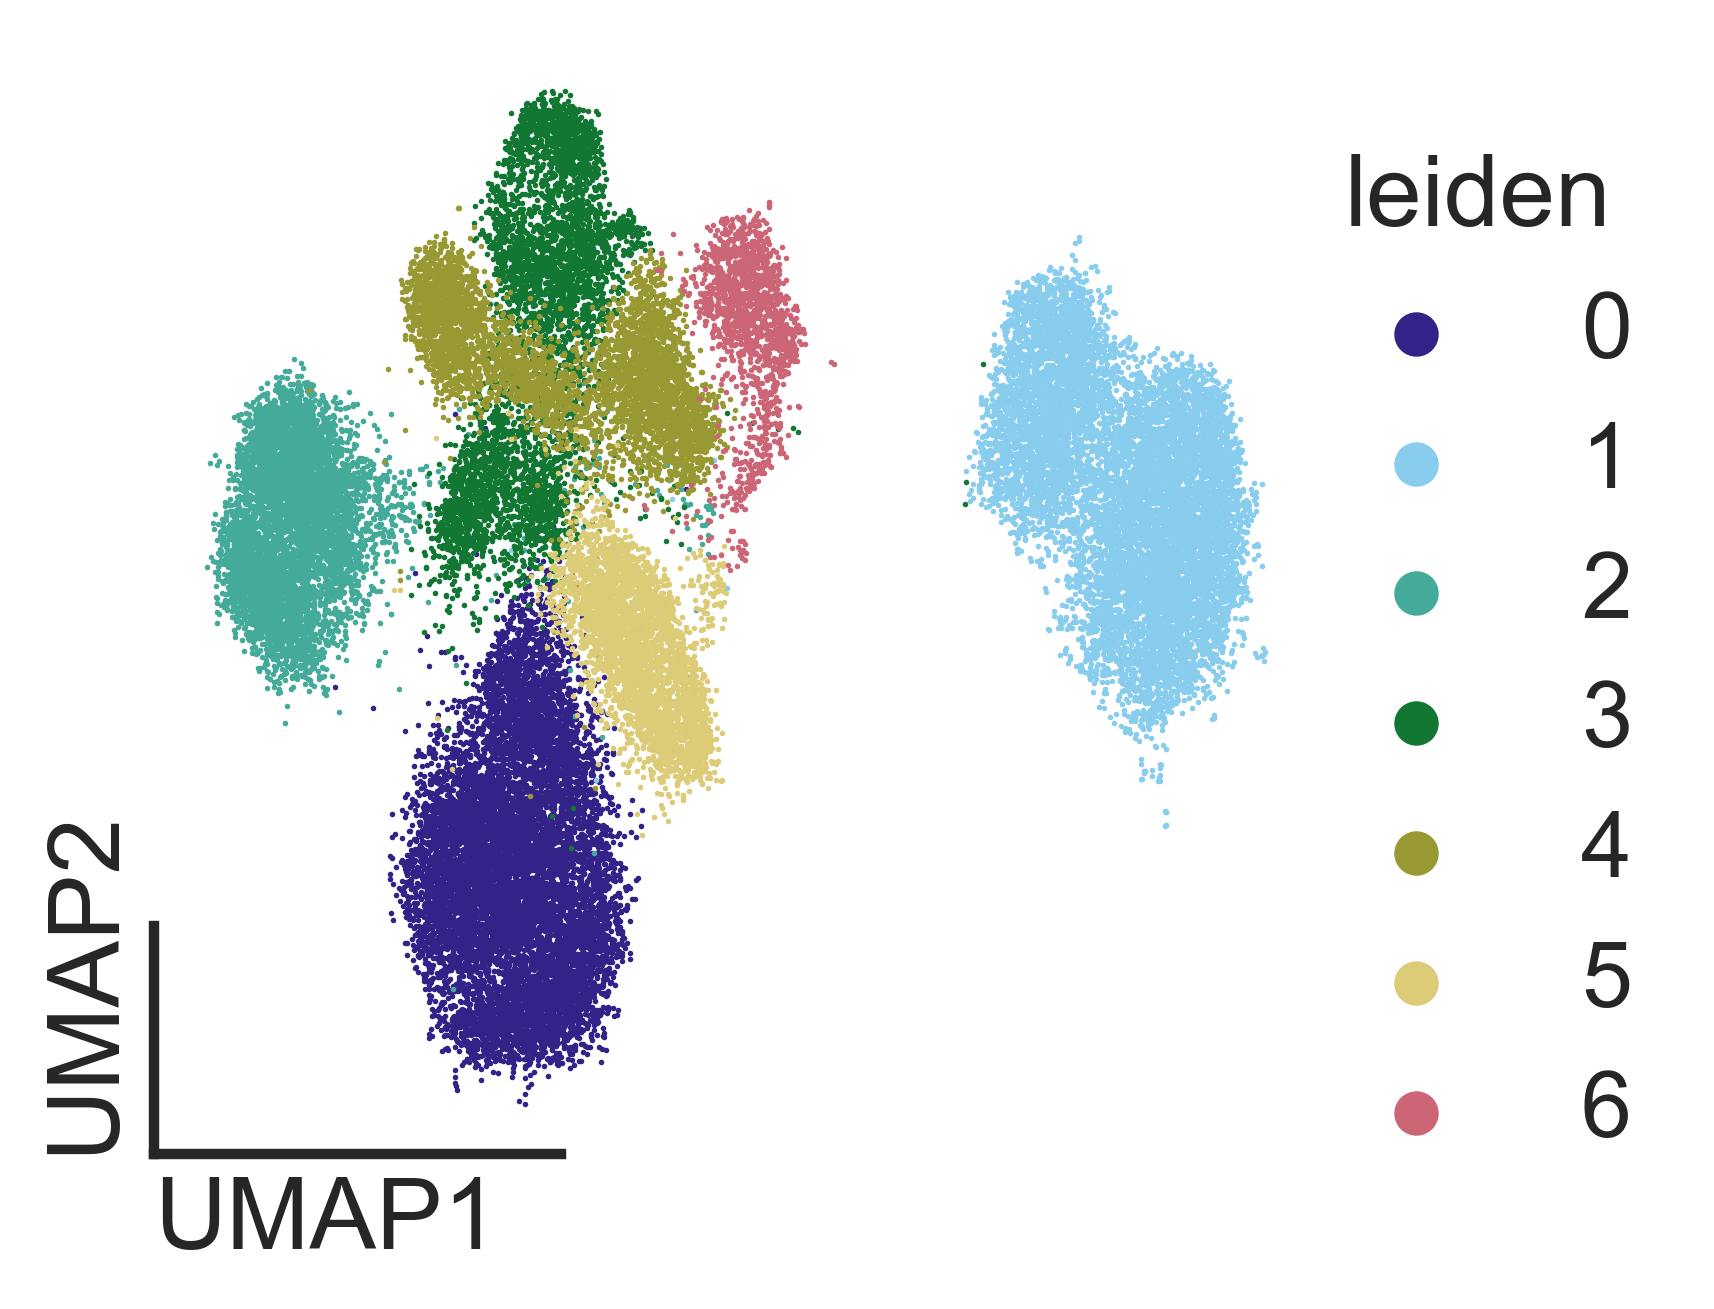

In [15]:
f = pl.highlight_scatterplot(
    data=adata,
    obsm_key='X_umap',
    hue='leiden',
    palette=palette,
    height=4,
    aspect=1.1,
    decorate_titles=False,
    trim_axes=True,
    scatter_kwargs={'s':1})

f.add_legend(markerscale=8)
f.set_titles(col_template='')

plt.savefig(plots_path / 'panel_C.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_C.svg', bbox_inches='tight')

## Panel D

### Set paths

In [16]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [17]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)
adata.raw = adata

In [18]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, random_state=12345)
sc.tl.umap(adata, random_state=12345) 
adata.obs[['UMAP1', 'UMAP2']] = adata.obsm['X_umap']

### UMAP
#### Tumor origin

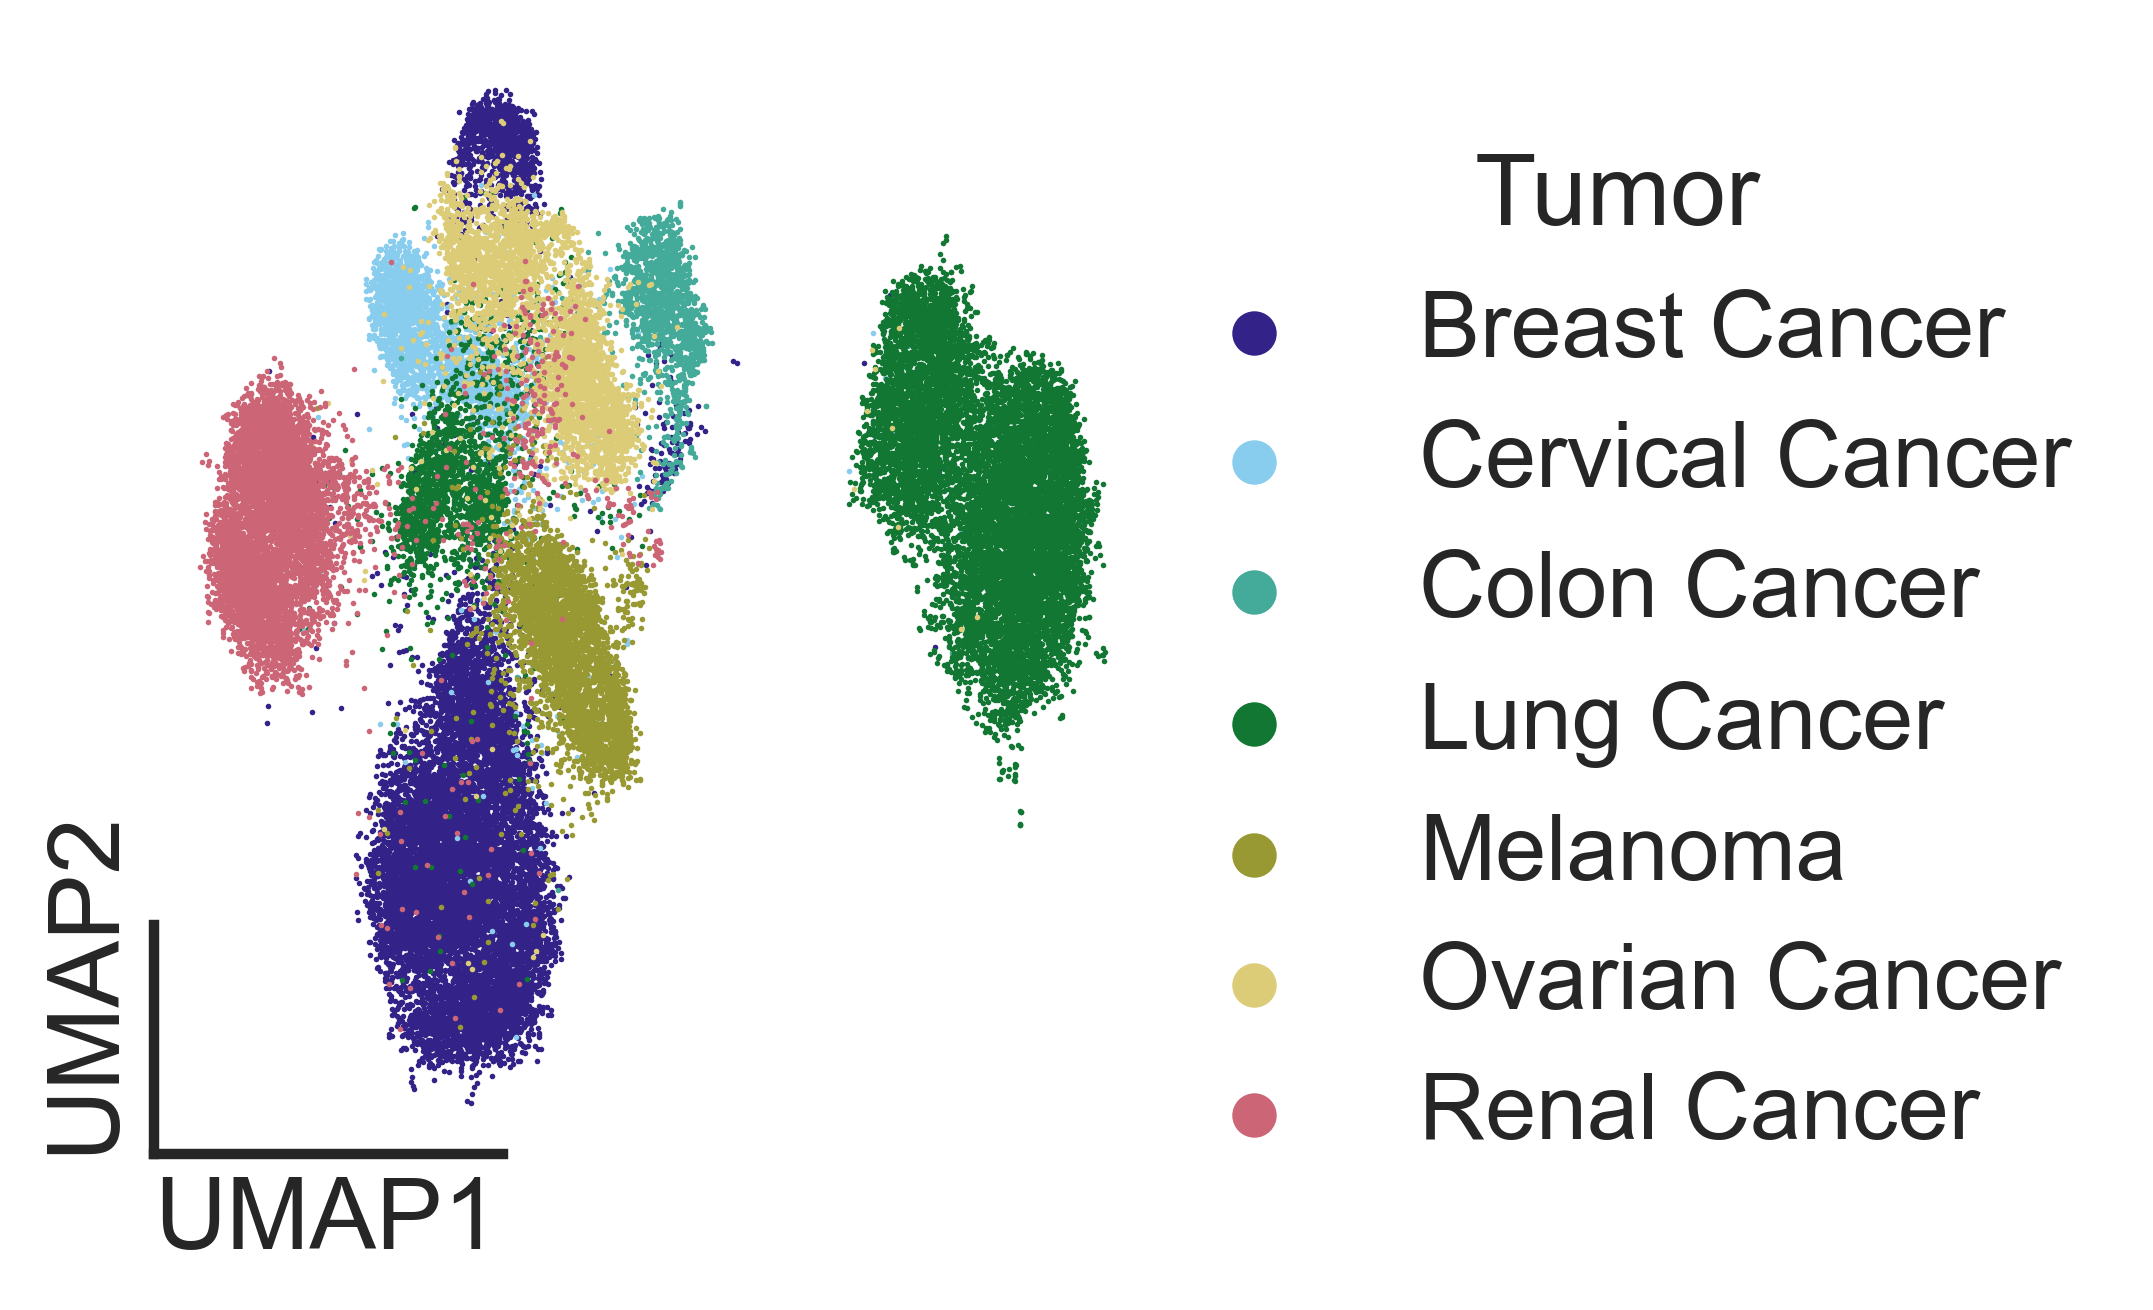

In [19]:
f = pl.highlight_scatterplot(
    data=adata,
    obsm_key='X_umap',
    hue='Tumor', 
    palette=palette,
    height=4,
    aspect=1.1,
    decorate_titles=False,
    trim_axes=True,
    scatter_kwargs={'s':1})

f.add_legend(markerscale=8)
f.set_titles(col_template='')

plt.savefig(plots_path / 'panel_D.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_D.svg', bbox_inches='tight')

## Panel E

### Set paths

In [20]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'
metabolite_path = data_dir / 'SC2_metabolite_IDs.csv'
markers_path = data_dir / 'SC2_DA_markers.csv'


#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [21]:
#load anndata file
adata = sc.read_h5ad(anndata_path)
adata.raw = adata

#load metabolite IDs file
metabolite_ID = pd.read_csv(metabolite_path)

In [22]:
#referemces for differential analysis
reference = 'rest'
column = 'CellLine'

#compute wilcoxon-rank-sum test results
sc.tl.rank_genes_groups(adata, groupby=column, method='wilcoxon', use_raw=False, reference=reference, pts=True)

#compile differential analysis results
DA = utils.compile_differential_analysis(adata, column, reference)

#Combine differential analysis results with metabolite IDs
DA_df = DA.merge(metabolite_ID, on='ion', how='inner')
DA_df.to_csv(data_dir / 'SC2_DA.csv')

In [23]:
sc.pp.pca(adata)
sc.tl.dendrogram(adata, groupby='CellLine', cor_method='pearson')
lower, upper=np.quantile(adata.layers['norm_counts'], [0.0, 0.99], axis=0)
adata.layers['clipped']=np.clip(adata.layers['norm_counts'], lower, upper)

### Dot plot

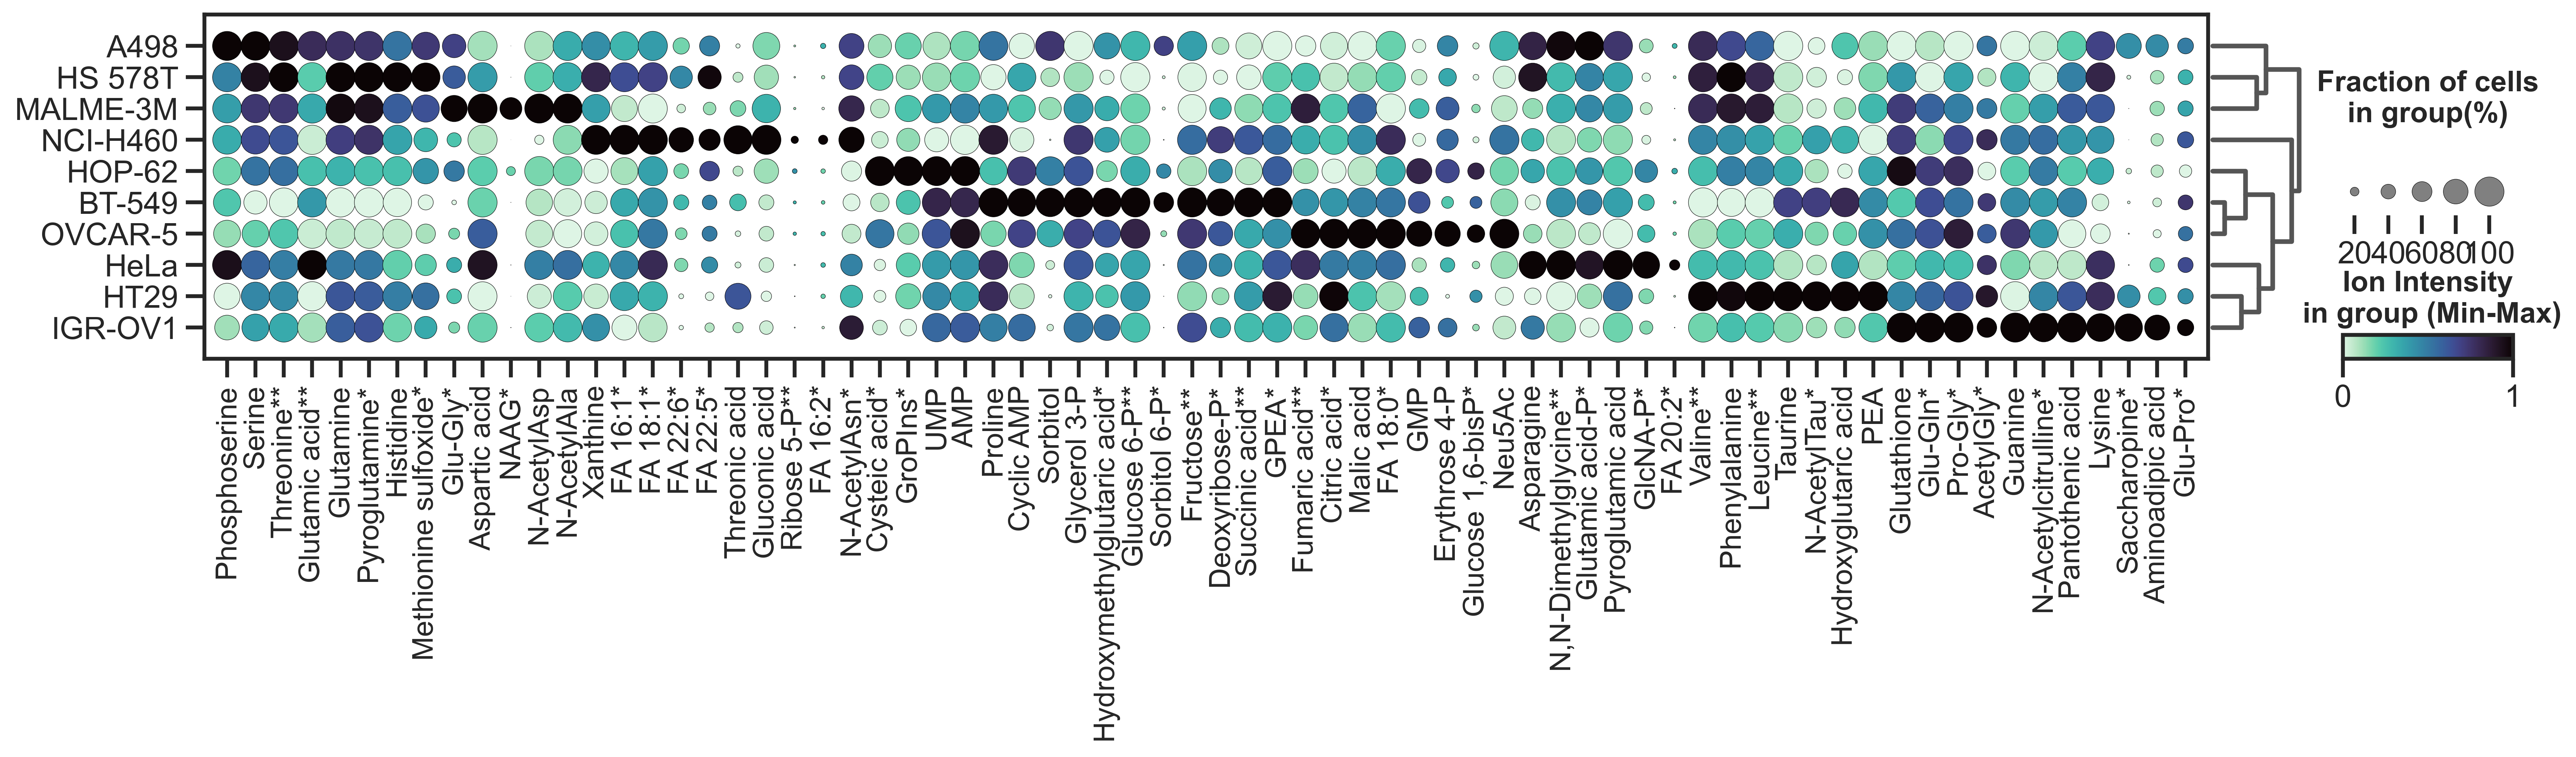

In [24]:
#load markers file
DA_markers = pd.read_csv(markers_path)

ax = sc.pl.dotplot(adata,
                   var_names=DA_markers['ion'],
                   layer='clipped',
                   groupby='CellLine',
                   use_raw=False,
                   dendrogram=True,
                   figsize=[20, 3],
                   swap_axes=False,
                   show=False,
                   cmap='mako_r',
                   standard_scale='var',
                   mean_only_expressed=False,
                   colorbar_title='Mean Intensity\nin group\n(Scaled')

ax['mainplot_ax'].set_xticklabels(labels=DA_markers['metabolites'],fontsize=14)
ax['color_legend_ax'].set_title(label='Ion Intensity\n in group (Min-Max)', fontsize=14,  weight='bold')
ax['size_legend_ax'].set_title(label='Fraction of cells\nin group(%)', fontsize=14,  weight='bold')

plt.savefig(plots_path / 'panel_E.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_E.svg', bbox_inches='tight')

## Preparing data for Overrepresentation Analysis

### Set paths

In [25]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC2_normalized.h5ad'

### Load data

In [26]:
#load anndata file
adata = sc.read_h5ad(anndata_path)
adata.raw = adata

In [27]:
#referemces for differential analysis
reference = 'rest'
column = 'CellLine'

#compute wilcoxon-rank-sum test results
sc.tl.rank_genes_groups(adata, groupby=column, method='wilcoxon', use_raw=False, reference=reference)

utils.prepare_ORA_file(adata, column, reference)

The R script ÓRA.Rmd  was used to perform ORA. Filtered output files are present in data folder to be used for panels F and G.

## Panel F

### Set paths

In [28]:
#input
data_dir = Path(r'../data')
ORAclass_path = data_dir / 'SC2_ORA_subclass.csv'

#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [29]:
#load file for ORA of class results
ORA_class = pd.read_csv(ORAclass_path).iloc[:, 1:]

In [30]:
#Filter only significant p-values
ORA_class = ORA_class[ORA_class['p_value'] < 0.05]
ORA_class['log10_pval'] = -np.log10(ORA_class['p_value'])

#Add column for direction (upregulated or downregulated)
ORA_class[['condition', 'direction']] = ORA_class['condition'].str.split('_', expand=True)
ORA_class.rename(columns={'TP': 'Intersection_Size', 'score': 'Fold_enrichment_score'}, inplace=True)

#Replace 'up' and 'down' with 'Upregulated' and 'Downregulated'
ORA_class['direction'] = np.where(ORA_class['direction'] == 'up', 'Upregulated', 'Downregulated')

#Convert the column to categorical with the specific order
specific_order = ['A498','BT-549','HOP-62','HS 578T','HT29','HeLa','IGR-OV1','MALME-3M','NCI-H460','OVCAR-5']
ORA_class['condition'] = pd.Categorical(ORA_class['condition'], categories=specific_order, ordered=True)
ORA_class = ORA_class.sort_values(by='condition').reindex()

### Dot plot

/var/folders/yd/30x9k4ks4xgcqd7x9_jk19c40000gn/T/ipykernel_59828/2823349366.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(2,0.5))


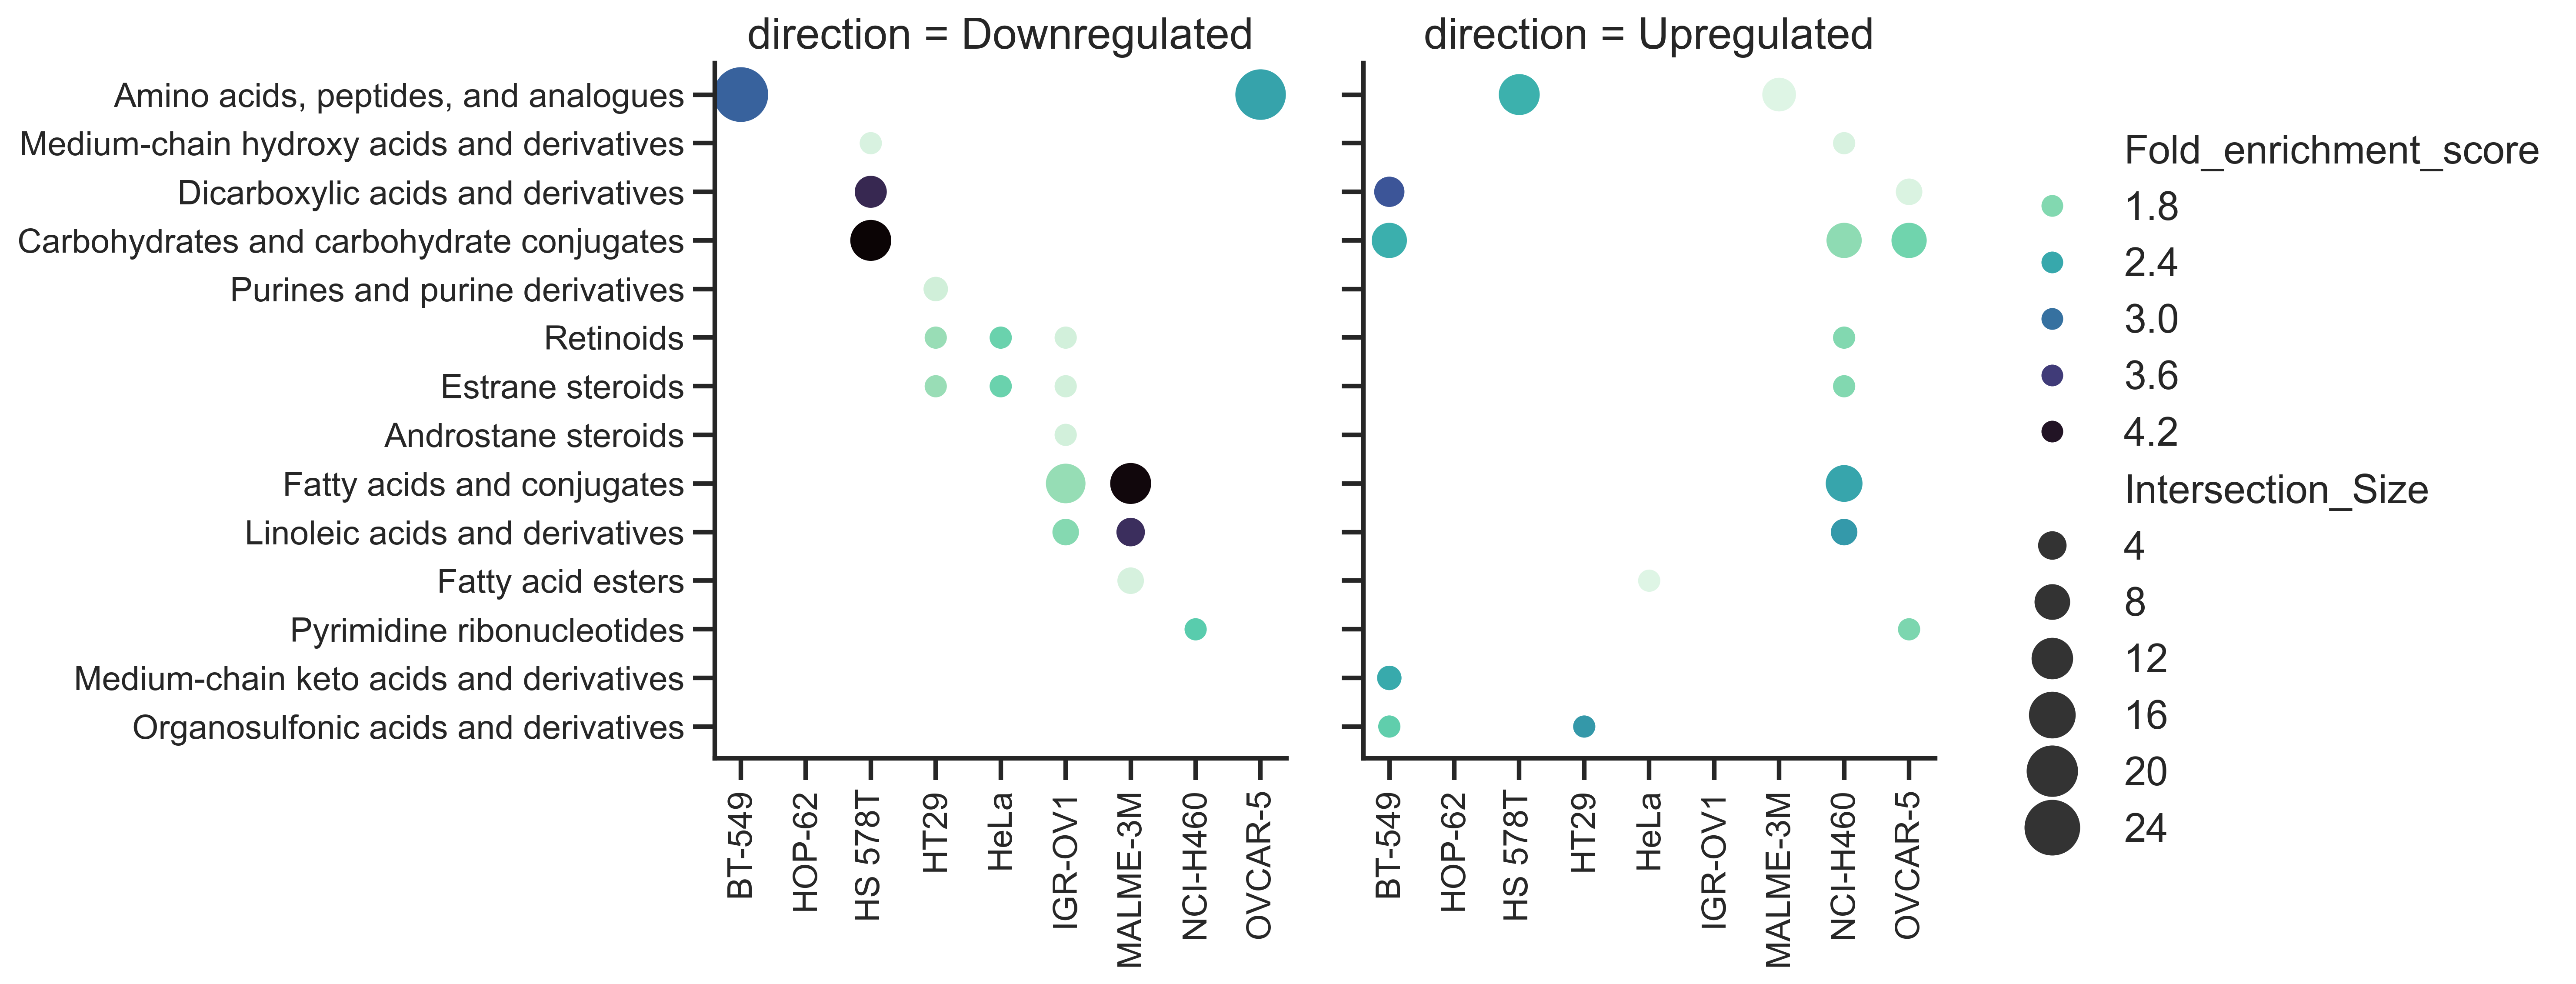

In [31]:
ax = sns.relplot(data=ORA_class.loc[(ORA_class['p_value']<0.05)], 
                 x='condition', 
                 y='Term', 
                 kind='scatter',
                 size='Intersection_Size',
                 sizes=(100,550),
                 hue='Fold_enrichment_score',
                 col='direction',
                 palette='mako_r',
                 height=6,
                 aspect=0.8,
                 legend=True)

plt.legend(loc='upper left', bbox_to_anchor=(2,0.5))
ax.set_ylabels('')
ax.set_xlabels('')

for g in ax.axes:    
    g[0].tick_params('y',labelsize=14)
    g[0].tick_params('x',labelsize=14, rotation=90)
    g[1].tick_params(labelsize=14, rotation=90)   
plt.tight_layout()

plt.savefig(plots_path / 'panel_F.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_F.svg', bbox_inches='tight')

## Panel G

### Set paths

In [32]:
#input
data_dir = Path(r'../data')
ORApathway_path = data_dir / 'SC2_ORA_pathways.csv'

#output
plots_path =  Path(r'../') / 'figures' / 'figure_4'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [33]:
#load file for ORA of pathways results
ORA_pathway = pd.read_csv(ORApathway_path).iloc[:, 1:]

In [34]:
#Filter only significant p-values and metabo pathways
ORA_pathway = ORA_pathway[(ORA_pathway['p_value'] <= 0.1) &
                          (ORA_pathway['plot']=='yes')]
ORA_pathway['log10_pval'] = -np.log10(ORA_pathway['p_value'])

#Add column for direction (upregulated or downregulated)
ORA_pathway[['condition', 'direction']] = ORA_pathway['condition'].str.split('_', expand=True)
ORA_pathway.rename(columns={'TP': 'Intersection_Size', 'score': 'Fold_enrichment_score'}, inplace=True)

#Replace 'up' and 'down' with 'Upregulated' and 'Downregulated'
ORA_pathway['direction'] = np.where(ORA_pathway['direction'] == 'up', 'Upregulated', 'Downregulated')

#Convert the column to categorical with the specific order
specific_order = ['BT-549','HOP-62','HS 578T','HeLa','IGR-OV1','MALME-3M','NCI-H460']
ORA_pathway['condition'] = pd.Categorical(ORA_pathway['condition'], categories=specific_order, ordered=True)
ORA_pathway = ORA_pathway.sort_values(by='condition').reindex()

### Dot plot

/var/folders/yd/30x9k4ks4xgcqd7x9_jk19c40000gn/T/ipykernel_59828/1346657108.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left',bbox_to_anchor=(2,0.5))


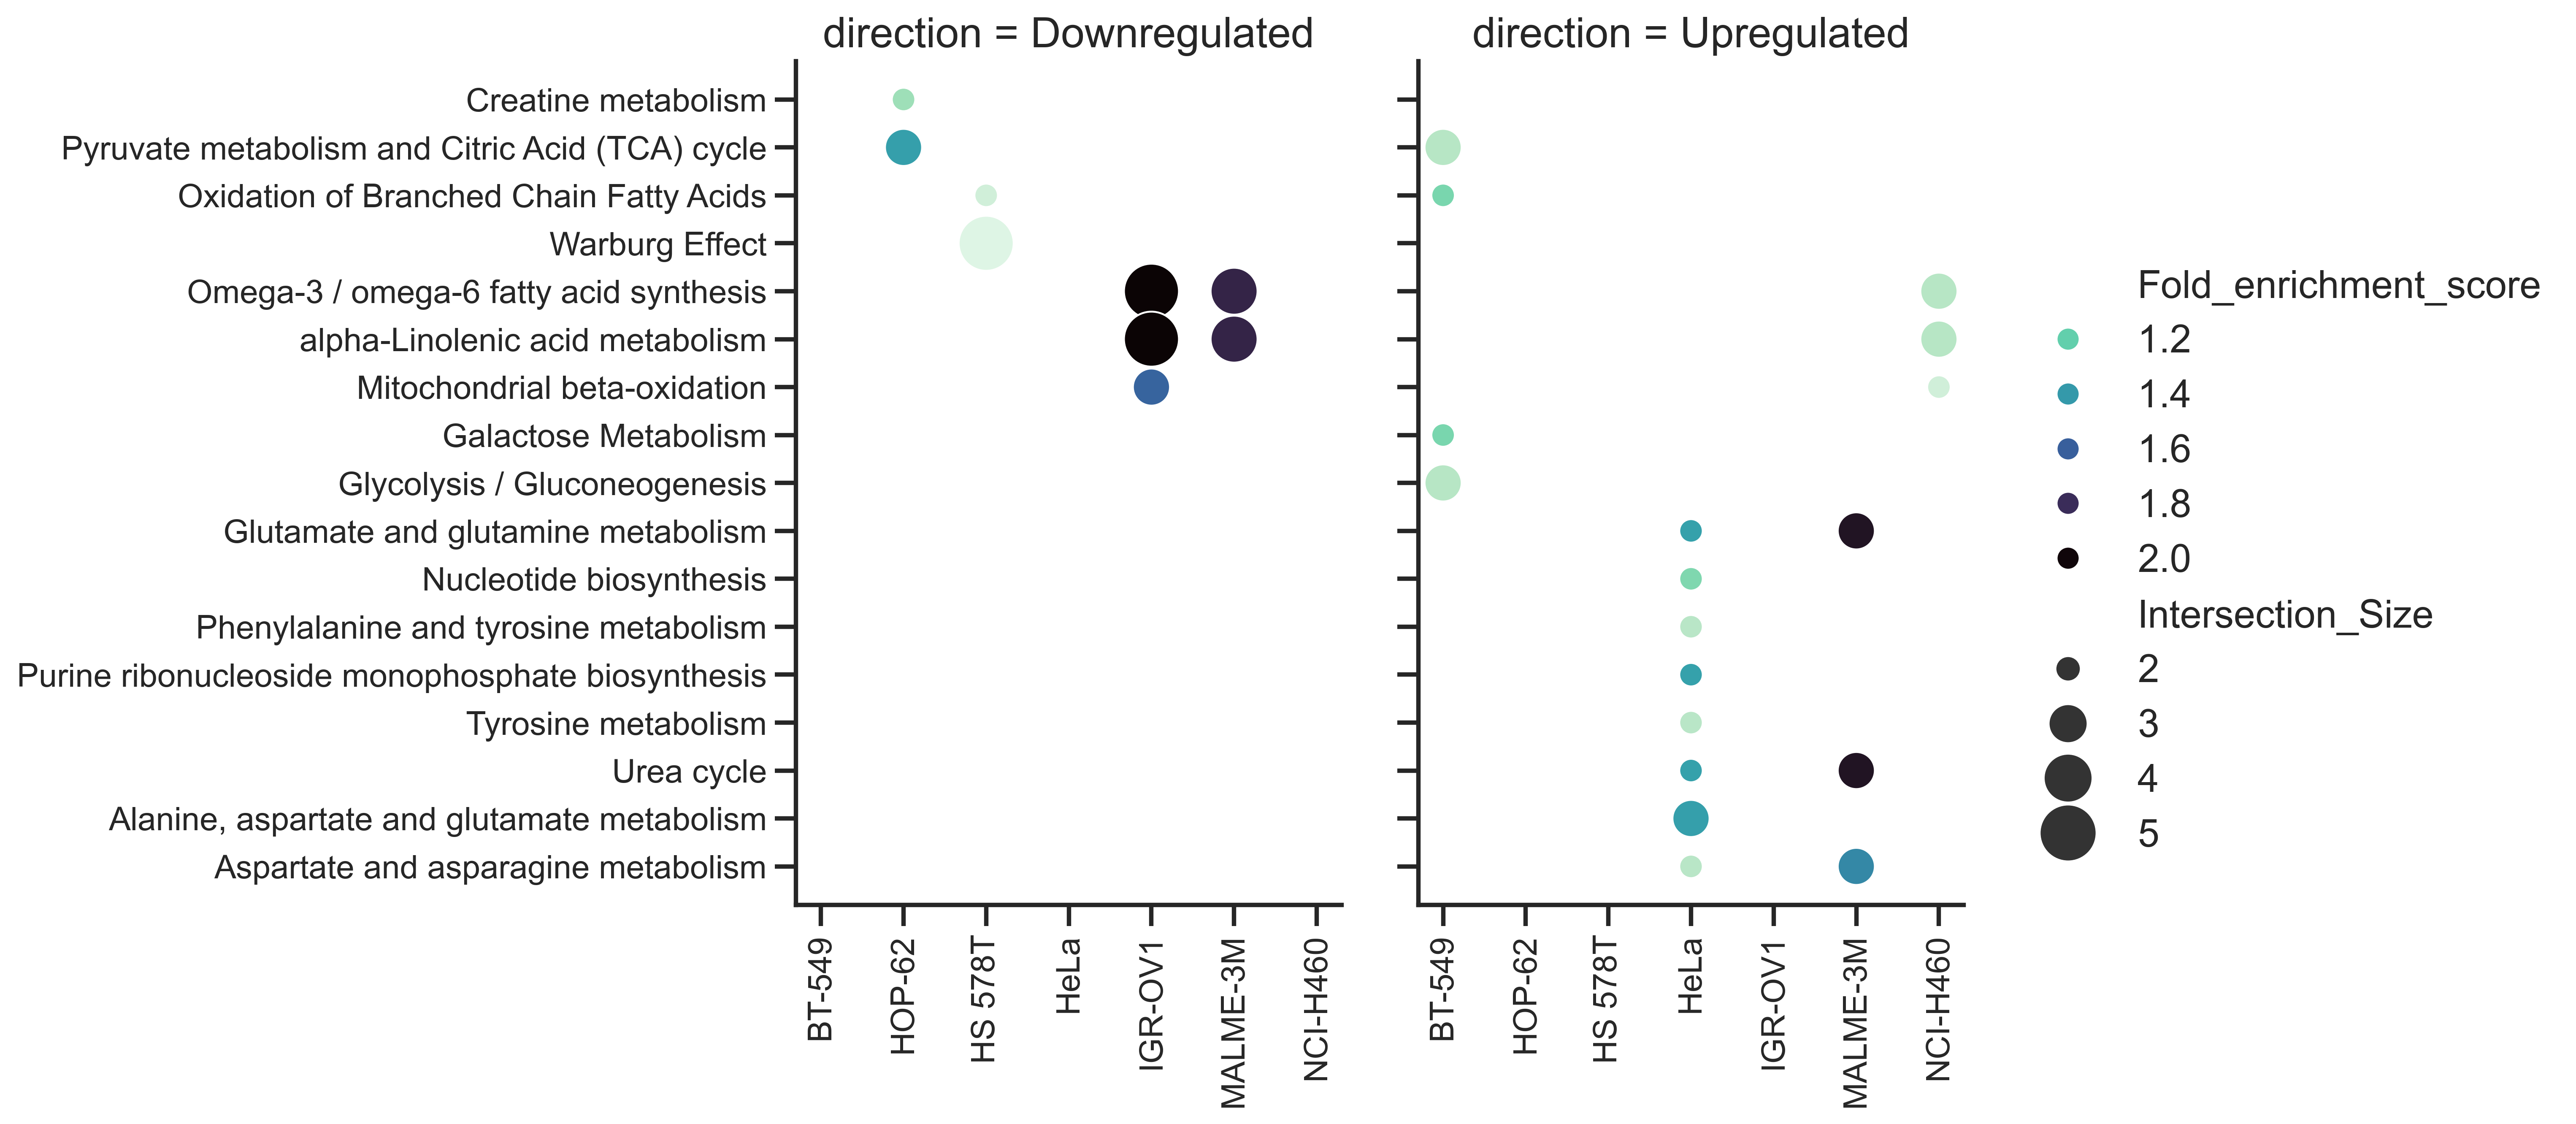

In [35]:
ax = sns.relplot(data=ORA_pathway, 
                 x='condition', 
                 y='Term', 
                 kind='scatter',
                 size='Intersection_Size', 
                 sizes=(100,550),
                 hue='Fold_enrichment_score',
                 col='direction',
                 col_order=['Downregulated', 'Upregulated'],
                 palette='mako_r',
                 height=7,
                 aspect=0.7,
                 legend=True)

plt.legend(loc='upper left',bbox_to_anchor=(2,0.5))
ax.set_ylabels('')
ax.set_xlabels('')

for g in ax.axes:    
    g[0].tick_params('y',labelsize=14)
    g[0].tick_params('x',labelsize=14, rotation=90)
    g[1].tick_params(labelsize=14, rotation=90)   
plt.tight_layout()

plt.savefig(plots_path / 'panel_G.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_G.svg', bbox_inches='tight')